# Using an API to get the current weather data for any ZIP code in the United States.

APIs (Application Programming Interface) allow two programs to "talk" to each other. We can think of an API as a set of functions that return data in a predefined format. 

## Sign up for an API key

Account here: https://home.openweathermap.org/users/sign_up

We need to include the API key in every API call that we make. Let's save the API key to a variable so that we don't need to rewrite it every time we need it. 

In [1]:
apiKey = "d3d241eee9dc8febf8081e87a89f97be"

## Read the Documentation

The first thing that we need to do is understand how to use the API, so let's take a look at the documentation.

Our goal is to get the current weather data for any ZIP code in the United States.


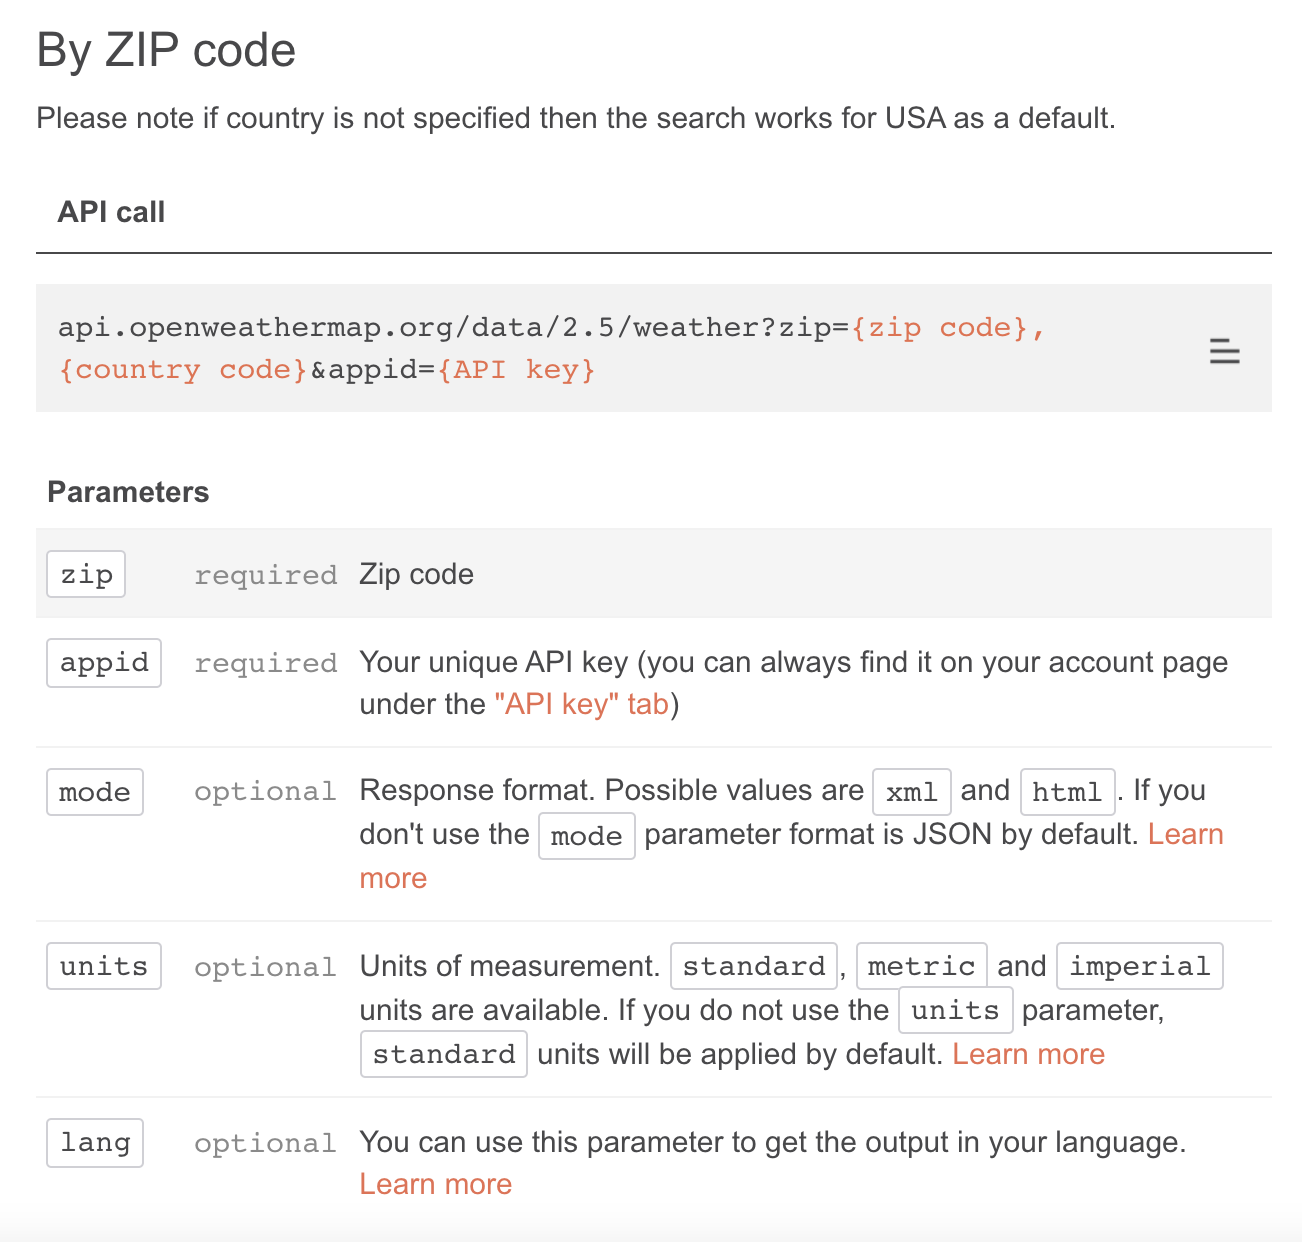

## Call the API

In [2]:
import json
import requests

We can then call the API. 

This API call gets the current temperature for the ZIP code 11385 in Fahrenheit. We then use json.loads to turn the response we get from the API into a Python object.

In [3]:
page = requests.get(f"https://api.openweathermap.org/data/2.5/weather?zip=90210&appid={apiKey}&units=imperial")
#print(data.content)
weatherJSON = json.loads(page.content)
weatherJSON


{'coord': {'lon': -118.4065, 'lat': 34.0901},
 'weather': [{'id': 721,
   'main': 'Haze',
   'description': 'haze',
   'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 90.52,
  'feels_like': 94.66,
  'temp_min': 76.33,
  'temp_max': 100.96,
  'pressure': 1012,
  'humidity': 48,
  'sea_level': 1012,
  'grnd_level': 992},
 'visibility': 10000,
 'wind': {'speed': 6.91, 'deg': 150},
 'clouds': {'all': 0},
 'dt': 1725393911,
 'sys': {'type': 2,
  'id': 2012608,
  'country': 'US',
  'sunrise': 1725370147,
  'sunset': 1725416212},
 'timezone': -25200,
 'id': 0,
 'name': 'Beverly Hills',
 'cod': 200}

## Extract the Data

Our goal is to get the following pieces of information:


1.   Current temperature
2.   Feels like temperature
3.   Minimum daily temperature
4.   Maximum daily temperature
5.   Humidity
6.   Description of weather conditions

Let's start with the current temperature. First, we need to locate the current temperature in the response:

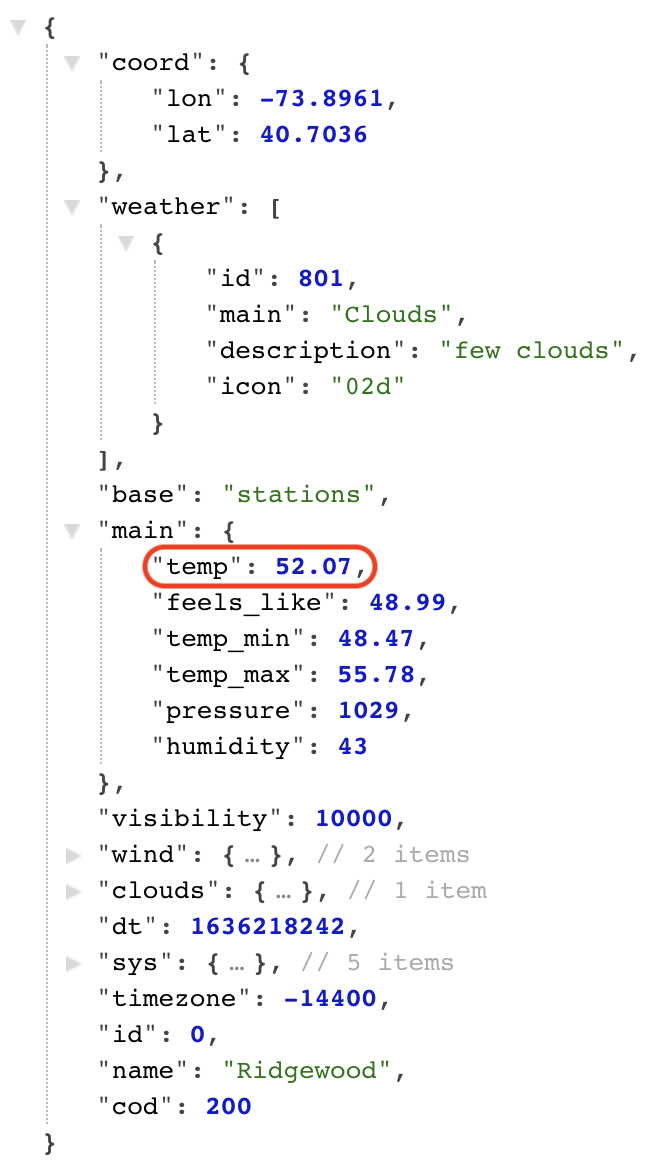

We see that the value for the current temperature is associated with the key "temp". The object containing the key "temp" is the value associated with the key "main". "main" is a key of the entire object, so this means that to access the current temperature, first we use the "main" key, then we use the "temp" key.

In [4]:
#print (weatherJSON["main"])
# this prints everything wheras, the code below will then only identify temp

currTemp = weatherJSON["main"]["temp"]
# name the variable
# call the json object
# specify the location of our key-value
print(f"Current temperature: {currTemp}")

Current temperature: 90.52


Similarly, to get the feels-like temperature, we notice that that value is associated with the key "feels_like", and that the object containing the key "feels_like" is the value associated with the key "main". This means that to access the feels like temperature, first we use the "main" key, then we use the "feels_like" key.

In [5]:
feelsLikeTemp = weatherJSON["main"]["feels_like"]
print(f"Feels like temperature: {feelsLikeTemp}")

Feels like temperature: 94.66


We can do the same for most of the other pieces of information we were looking for.

In [6]:
minTemp = weatherJSON["main"]["temp_min"]
print(f"Minimum daily temperature: {minTemp}")

maxTemp = weatherJSON["main"]["temp_max"]
print(f"Maximum daily temperature: {maxTemp}")

humidity = weatherJSON["main"]["humidity"]
print(f"Humidity: {humidity}")

Minimum daily temperature: 76.33
Maximum daily temperature: 100.96
Humidity: 48


In [7]:
# to retrieve all the values in the "main" nested object using a for loop
main_obj = weatherJSON["main"]
print(main_obj)

for obj in main_obj:
  print(obj + ":", main_obj[obj])

{'temp': 90.52, 'feels_like': 94.66, 'temp_min': 76.33, 'temp_max': 100.96, 'pressure': 1012, 'humidity': 48, 'sea_level': 1012, 'grnd_level': 992}
temp: 90.52
feels_like: 94.66
temp_min: 76.33
temp_max: 100.96
pressure: 1012
humidity: 48
sea_level: 1012
grnd_level: 992


We notice that the weather description is the value associated with the key "description". The object with the key "description" is the first element of an array, so we will need to use the index 0 to access that object. That array is the value associated with the key "weather", and "weather" is a key of the entire object. This means that to access the weather description, we will need to use the key "weather", then the index 0, then the key "description".

In [8]:
description = weatherJSON["weather"][0]["description"]
print(f"Description of current weather conditions: {description}")

Description of current weather conditions: haze


In [9]:
# print the weather key-value, this will be an arry[]
print (weatherJSON["weather"])
# print the first element inside thw weather key-value, this will be the first and only object inside of the area {}
print(weatherJSON["weather"][0])

descTemp = weatherJSON["weather"][0]["description"]
print(f"The weather in Beverly Hills is: {descTemp}")

[{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}]
{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}
The weather in Beverly Hills is: haze


With that, we have obtained all of the information we were looking for from the API response. To expand on this, we can write a function that takes in a ZIP code and returns a dictionary of all of the weather data we care about.

In [10]:
def getWeatherByZipCode(zip):
    """
    Returns weather information for the zip code indicated by the argument

    zipCode should be a 5-digit string
    """
    page = requests.get(f"https://api.openweathermap.org/data/2.5/weather?zip={zip}&appid={apiKey}&units=imperial")
    weatherJSON = json.loads(page.content)

    #current temp
    currTemp = weatherJSON["main"]["temp"]

    #feels like temperature
    feelsLikeTemp = weatherJSON["main"]["feels_like"]

    #minimum daily temp
    minTemp = weatherJSON["main"]["temp_min"]

    #maximum daily temp
    maxTemp = weatherJSON["main"]["temp_max"]

    #humidity
    humidity = weatherJSON["main"]["humidity"]

    #description
    description = weatherJSON["weather"][0]["description"]

    return {
        "currTemp": currTemp,
        "feelsLikeTemp": feelsLikeTemp,
        "minTemp": minTemp,
        "maxTemp": maxTemp,
        "humidity": humidity,
        "description": description
    }

In [11]:
#here we test the above function with the ZIP code 11226
getWeatherByZipCode("11226")

{'currTemp': 73.85,
 'feelsLikeTemp': 72.57,
 'minTemp': 70.92,
 'maxTemp': 76.17,
 'humidity': 35,
 'description': 'broken clouds'}